In [1]:
# Import the appropriate modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
%matplotlib inline

In [26]:
# Import the data and drop columns

df = pd.read_csv('/Users/jack.galvin/Desktop/Project2/multidimensionalsfdc.csv')
df.drop(['Account Name'], axis=1, inplace=True)

In [27]:
# Check for null values to decide on how to impute NaN

df.isna().sum()

PET Annual Revenue    1320
PET Employees          506
$LTV                     0
$ARR                     0
PET Match Score        422
dtype: int64

In [28]:
# Normalize data before using KNNImputer

scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,PET Annual Revenue,PET Employees,$LTV,$ARR,PET Match Score
0,0.046040,0.081301,1.266691,0.702364,0.111111
1,NaN,2.655827,0.132711,-0.009598,NaN
2,6.877703,38.178862,1.705596,1.348553,0.000000
3,1.090374,7.560976,0.546224,0.212212,0.111111
4,1.172886,6.720867,5.807660,6.279118,0.000000


In [29]:
# Impute using KNNImputer

imputer = KNNImputer(n_neighbors=15)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [32]:
# Remove outliers

df = df.loc[(df['PET Annual Revenue'] < 0.4) & (df['PET Employees'] < 0.4) & (df['$ARR'] < 0.4), :]
df = df.loc[df['$ARR'] < 2.5, :]

In [33]:
# Confirm that all NaN values are gone

df.isna().sum()

PET Annual Revenue    0
PET Employees         0
$LTV                  0
$ARR                  0
PET Match Score       0
dtype: int64

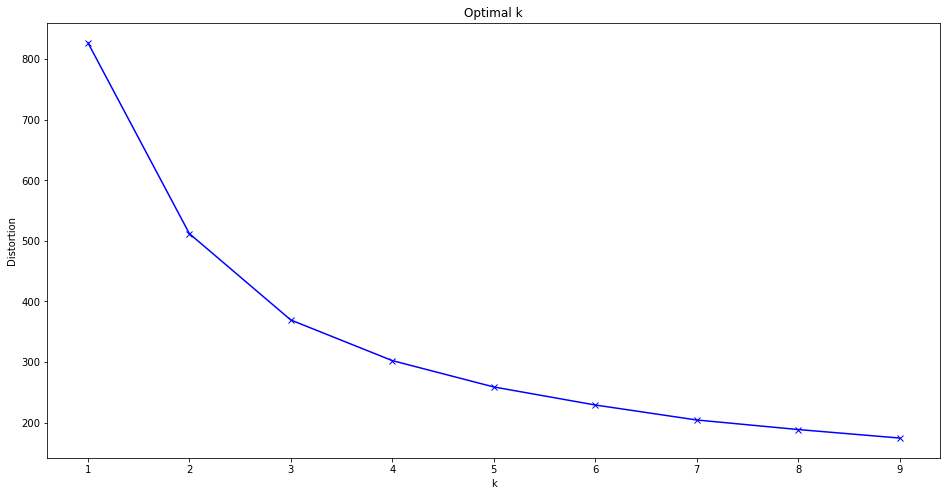

In [34]:
# Use elbow method to determine K

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()

In [35]:
# Run kmeans

kmeans = KMeans(n_clusters = 2, max_iter = 400, n_init= 15, init = 'k-means++', random_state = 42)
predicted_k = kmeans.fit_predict(df)

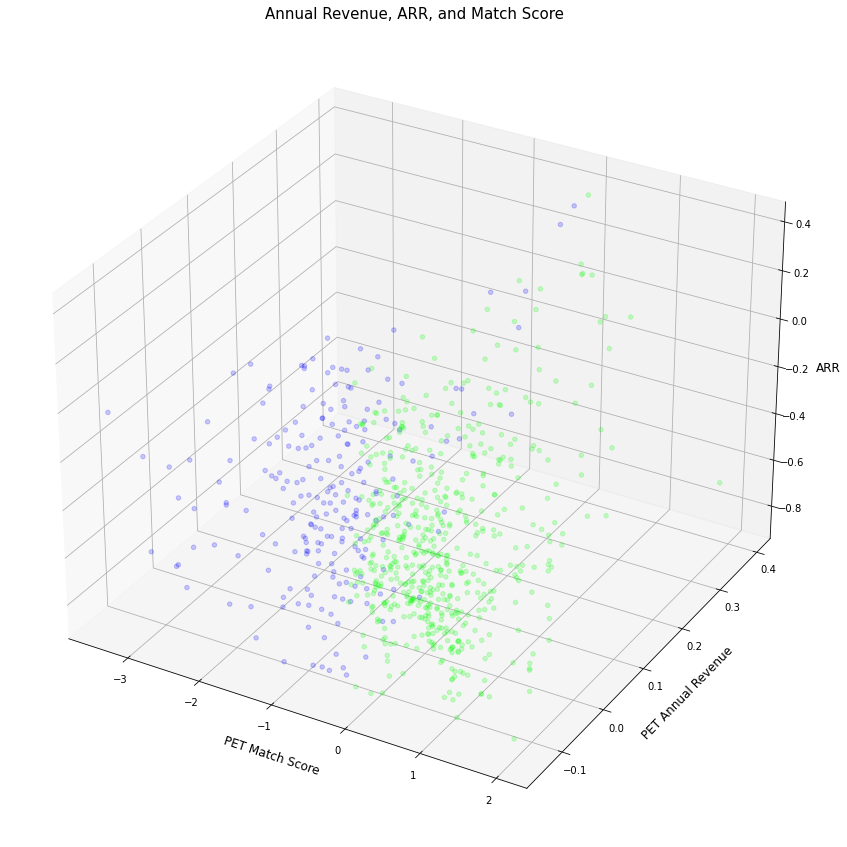

In [36]:
# Plot the clusters

fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection ='3d') 

ax.scatter(df.iloc[:,4], df.iloc[:,0], df.iloc[:,3], c = predicted_k, cmap = 'brg', alpha = 0.2);

ax.set_title("Annual Revenue, ARR, and Match Score", size=15)
ax.set_xlabel("PET Match Score", size=12, labelpad=10)
ax.set_ylabel("PET Annual Revenue", size=12, labelpad=10)
ax.set_zlabel("ARR", size=12, labelpad=10)

plt.show()